In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Tiamat as tiam

[0.974 0.961 0.928 0.869 0.777 0.667 0.556 0.443 0.345 0.257 0.182 0.131
 0.103 0.1  ]
[ 0  8 16 24 32 40 48 55 62 69 76 83 90 93]
Slope: 87.17612563984922, Intercept: 3.194221750076778
Matrice di covarianza:
[[ 3.19820882 -0.09657906]
 [-0.09657906  1.14365818]]


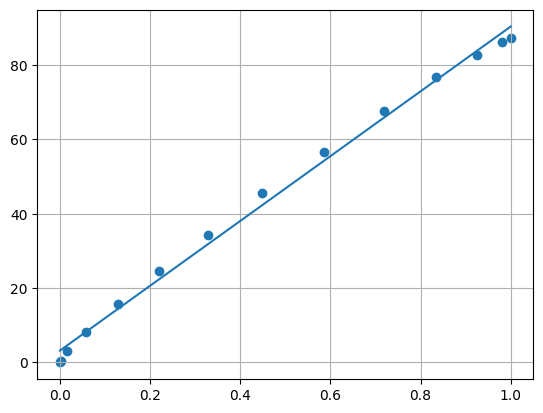

In [5]:
#Posizione angolare
# theta = posizione
# angolo = phi
def gradtorad(gradi,primi):
    angolo = gradi + primi/60
    return (angolo*np.pi)/180

theta0 = 248
I = np.array([87.4,86.1,82.8,76.9,67.7,56.7,45.6,34.3,24.5,15.7,8.2,3.1,0.3,0])
thetha1 = np.array([254,262,270,278,286,294,302,309,316,323,330,337,344,347])
print(0.01*I+0.1)
X = np.sort(np.cos(gradtorad(thetha1-254,0))**2)
print(thetha1-254)

I = np.sort(I)
plt.scatter(X,I)
slope0,intercept0,cov_matrix0 = tiam.fit_lineare(X,I,2*np.cos(X)*np.sin(X),0.01*I+0.1)
plt.plot(X,intercept0+slope0*X)
plt.grid()
plt.show()

In [ ]:
def p(lampda):
    a = 2.682
    b = 20.114
    c = 0.655
    return a + b/(lampda**2) + c/(lampda**4)

def c(DT,L):
    return DT/(p(0.670)*L)

lamdpa = 0.670
L = 1.08 # dm
Deltatheta0 = np.array([40,42,39,40,41]) #gradi
DM1 = np.average(Deltatheta0)
Deltathetha1 = np.array([38,36,36,35,37])#gradi
DM2 = np.average(Deltathetha1)

ERR_C0 = tiam.prop_no_cor(c,DM1,L,2,0.1)
ERR_C1 = tiam.prop_no_cor(c,DM2,L,2,0.1)
print(ERR_C0)
print(ERR_C1)

print("p:",p(lamdpa))
print("DM1:",DM1)
print("DM2:",DM2)

print(c(DM1,L))
print(c(DM2,L))

print(tiam.consistenza_statistica(c(DM1,L),c(DM2,L),ERR_C0,ERR_C1))

thetafinale = np.array([79,74,74,73,74])
print(np.average(thetafinale))
print(c(np.average(thetafinale),L))

0.07740721607973818
0.07151794523213732
p: 50.73974626632433
DM1: 40.4
DM2: 36.4
0.7372407266497207
0.6642465952982632
a:  1.1069667980990032
(True, 1.1069667980990032)
74.8
[1.44163409 1.35039143 1.35039143 1.3321429  1.35039143]
